# Aufgabe 1

In [1]:
import numpy as np
from sympy import symbols, integrate

In [2]:
# Basisfunktionen auf dem Referenzelement

def myshape(t,j):
    xi, eta = t
    if j == 0:
        return 1-xi-eta
    elif j==1:
        return xi
    else:
        return eta

def Dmyshape(t,j):
    xi, eta = t
    if j == 0:
        return np.array([-1,-1])#,dtype=np.float64)
    elif j==1:
        return np.array([1,0])#,dtype=np.float64)
    else:
        return np.array([0,1])#,dtype=np.float64)

In [3]:
xi,eta = symbols('xi,eta')

In [4]:
Ae = np.array([[integrate(Dmyshape([xi,eta],j)@Dmyshape([xi,eta],k),(eta,0,1-xi),(xi,0,1)) 
                for k in range(3)] for j in range(3)])
Ae

array([[1, -1/2, -1/2],
       [-1/2, 1/2, 0],
       [-1/2, 0, 1/2]], dtype=object)

In [5]:
Me = np.array([[integrate(myshape([xi,eta],j)*myshape([xi,eta],k),(eta,0,1-xi),(xi,0,1))
                for k in range(3)] for j in range(3)])
Me

array([[1/12, 1/24, 1/24],
       [1/24, 1/12, 1/24],
       [1/24, 1/24, 1/12]], dtype=object)

# Aufgabe 2

In [7]:
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-zt5iputl because the default path (/home/jupyter-stiw/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [8]:
pts = np.array([
    [0,0],
    [0.5,0],
    [1,0],
    [0,0.5],
    [0.5,0.5],
    [1,0.5],
    [0,1],
    [0.5,1],
    [1,1]
])

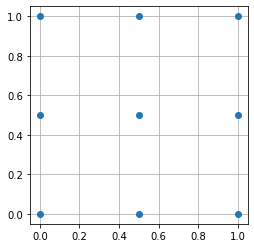

In [12]:
plt.plot(*pts.T,'o')
plt.gca().set_aspect(1)
plt.grid()
plt.show()

In [22]:
T = np.array([
    [0,1,3],
    [1,4,3],
    [1,2,4],
    [2,5,4],
    [3,4,6],
    [4,7,6],
    [4,5,7],
    [5,8,7]
])

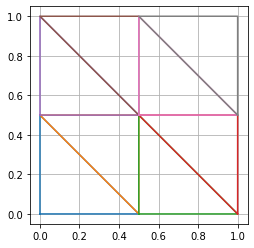

In [23]:
for t in T:
    plt.plot(*pts[np.concatenate([t,[t[0]]])].T)
plt.gca().set_aspect(1)
plt.grid()
plt.show()

In [24]:
def invDsigma(p1,p2,p3):
    return np.linalg.inv(np.array([(p2-p1),(p3-p1)]).T)

In [25]:
# Berechnung der C_i Matrix und Jacobi Determinante
def CnJ(p1,p2,p3):
    A = np.array([(p2-p1),(p3-p1)]).T
    invA = np.linalg.inv(A)
    return invA@invA.T, np.linalg.det(A)

# Gebietsintegration über Einheitsdreieck
from scipy.integrate import dblquad
def quadT(f):
    return dblquad(f, 0, 1, 0, lambda x: 1-x)[0]

In [27]:
pts[T[0]]

array([[0. , 0. ],
       [0.5, 0. ],
       [0. , 0.5]])

In [34]:
T[5]

array([4, 7, 6])

In [35]:
np.ix_(T[5],T[5])

(array([[4],
        [7],
        [6]]),
 array([[4, 7, 6]]))

In [41]:
def myfun(x):
    return 1

In [43]:
A = np.zeros((pts.shape[0],pts.shape[0]))
f = np.zeros(pts.shape[0])
for t in T:
    # lokale Elemetmatrix berechnen
    Ci, Ji = CnJ(*pts[t])
    Ai = np.array([[ quadT(lambda x,y: Dmyshape([x,y], j)@Ci@Dmyshape([x,y], k)*Ji)
           for k in range(3)] for j in range(3)])
    # an globalen Freiheitsgrade speichern
    A[np.ix_(t,t)] += Ai
    
    # lokale rechte Seite
    fi = np.array([quadT(lambda x,y: 
                         myfun(pts[t[0]]+np.array([pts[t[1]]-pts[t[0]],pts[t[2]]-pts[t[0]]])@np.array([x,y]))
                         *myshape([x,y], j)*Ji) for j in range(3)])
    # globale rechte Seite
    f[t] += fi

In [44]:
A

array([[ 1. , -0.5,  0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  2. , -0.5,  0. , -1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  1. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. ,  2. , -1. ,  0. , -0.5,  0. ,  0. ],
       [ 0. , -1. ,  0. , -1. ,  4. , -1. ,  0. , -1. ,  0. ],
       [ 0. ,  0. , -0.5,  0. , -1. ,  2. ,  0. ,  0. , -0.5],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  1. , -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  0. , -0.5,  2. , -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. , -0.5,  1. ]])

In [45]:
f

array([0.04166667, 0.125     , 0.08333333, 0.125     , 0.25      ,
       0.125     , 0.08333333, 0.125     , 0.04166667])

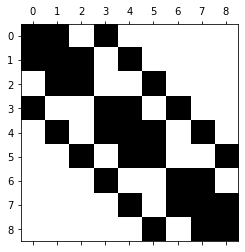

In [38]:
plt.spy(A)